<a href="https://colab.research.google.com/github/caalvaro/ArtificialIntelligence/blob/main/Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema das N-Rainhas

Dado um tabuleiro de tamanho $N \times N$, desejamos encontrar uma configuração onde $N$ rainhas são dispostas de forma que não haja nenhum ataque entre elas.

Por exemplo, num tabuleiro $4\times4$, a configuração abaixo não é ótima pois possui 5 ataques possíveis entre as rainhas:


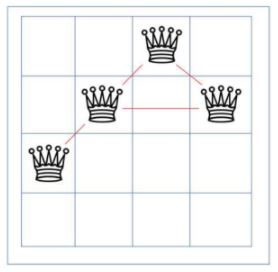


Já este tabuleiro é uma solução ótima pois nenhuma rainha se ataca:

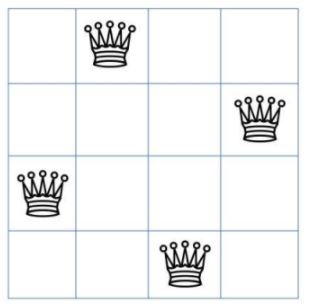



#1 - Modelagem
Optamos por modelar os tabuleiros $N \times N$ usando um array de tamanho $N$. Onde cada posição no array representa uma coluna e o número nessa posição representa a linha na qual a rainha está. Dessa forma, cada coluna terá necessariamente uma rainha, pois não estamos interessados nos casos em que há mais de uma rainha por coluna, já que não será uma possível solução ótima de qualquer forma.

As colunas e as colunas são contadas de  $0$  até  $N−1$ , assim, o tabuleiro dado pela figura

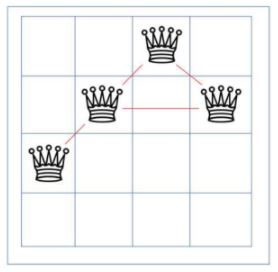

É representado pelo array $[ 2, 1, 0, 1]$



#2 - Implementação Base

Usamos as seguintes bibliotecas para desenvolver esse trabalho.

In [1]:
import random                     # geração de números aleatórios
import math                       # uso da função exponencial
import matplotlib.pyplot as plt   # gráficos para analisar os parâmetros do algoritmos

Função para gerar tabuleiros aleatoriamente.

Recebe como parâmetro:


1.   **N:** Tamanho do tabuleiro
2.   **quantidadeTabuleiros:** a quantidade de tabuleiros a serem gerados

Retorna um array com todos os tabuleiros gerados.


In [2]:
def geraTabuleiro(N, quantidadeTabuleiros):
  tabuleiros = []

  for i in range(quantidadeTabuleiros):
    tabuleiro = []

    for j in range(N):
      tabuleiro.append(random.randint(0,N-1))

    tabuleiros.append(tabuleiro)

  return tabuleiros

Função para gerar todos os vizinhos de um tabuleiro.

Recebe como parâmetro:


1.   **tabuleiro:** tabuleiro a ser analisado

Retorna um array com todos os tabuleiros vizinhos a ele, ou seja, todas as possibilidades de movimento das rainhas.

In [3]:
def todosVizinhos(tabuleiro):
  vizinhos = []
  
  for i in range(len(tabuleiro)):
    for j in range(len(tabuleiro)):
      nova_linha = j
      
      if (nova_linha != tabuleiro[i]):
        temp_tabuleiro = tabuleiro[:]
        temp_tabuleiro[i] = nova_linha
        vizinhos.append(temp_tabuleiro) 

  return vizinhos

Função para gerar um vizinho aleatório ao tabuleiro.

Recebe como parâmetro:


1.   **tabuleiro:** tabuleiro a ser analisado

Retorna um array que representa um vizinho qualquer desse tabuleiro.

In [4]:
def umVizinhoAleatorio(tabuleiro):
  vizinhos = todosVizinhos(tabuleiro)
  numeroAleatorio = random.randint(0, len(vizinhos)-1)

  return vizinhos[numeroAleatorio]

Função para gerar um tabuleiro aleatório.

Recebe como parâmetro:


1.   **tamanhoTabuleiro:** tamanho do tabuleiro a ser gerado

Retorna um array que representa um tabuleiro qualquer.

In [5]:
def estadoAleatorio(tamanhoTabuleiro):
  return geraTabuleiro(tamanhoTabuleiro, 1)[0]

Função para contar quantos ataques são possíveis de serem feitos.

Conta apenas uma vez a quantidade de ataques entre as rainhas. Exemplo: se a rainha A ataca a rainha B, então B ataca A. Isso é contado como 1 ataque.

Recebe como parâmetro:

1.   **tabuleiro:** tabuleiro a ser analisado

Retorna o número de ataques entre as rainhas do tabuleiro

In [6]:
def numeroAtaques(tabuleiro):
  totalAtaques = 0

  for i in range(len(tabuleiro)):
    linhaRainhaAtual = tabuleiro[i]

    # analisa as próximas colunas a partir da atual
    for j in range(i+1, len(tabuleiro)):
      linhaRainhaAnalisada = tabuleiro[j]

      # se estão na mesma linha
      if (linhaRainhaAtual == linhaRainhaAnalisada):
        totalAtaques += 1

      # se estão na mesma diagonal
      elif (abs(i-j) == abs(linhaRainhaAtual - linhaRainhaAnalisada)):
        totalAtaques += 1

  return totalAtaques

#3 - Simulated Annealing

Uma implementação do algoritmo feita em Python. O algoritmo é baseado nas referências usadas em aula, com algumas alterações.

Recebe como parâmetro:

1.   **tamanhoTabuleiro:** tamanho do tabuleiro no problema
2.   **maximoDeIteracoes:** quantidade máxima de iterações que podem haver no algoritmo
3.   **temperaturaInicial:** temperatura inicial para o problema
4.   **alfa:** taxa de decaimento da temperatura a cada iteração

Retorna uma 5-upla *melhorEstado, numeroAtaques(melhorEstado), numeroDeMelhoras, numeroDeTrocasAleatorias, iteracoesAteAResposta*:

1.  **melhorEstado:** melhor estado encontrado durante a execução
2.   **numeroAtaques(melhorEstado):** número de ataques possíveis no melhor estado encontrado
3.   **numeroDeMelhoras:** número de melhoras que foram feitas no tabuleiro durante a execução
4.   **numeroDeTrocasAleatorias:** número de trocas aleatórias que foram feitas no tabuleiro durante a execução
5.   **iteracoesAteAResposta:** número de iterações necessárias até achar a melhor solução. É $-1$ se não foi encontrada a melhor solução.

In [7]:
def simulatedAnnealing(tamanhoTabuleiro, maximoDeIteracoes, temperaturaInicial, alfa):
  estadoCorrente = estadoAleatorio(tamanhoTabuleiro)
  melhorEstado = estadoCorrente
  temperaturaCorrente = temperaturaInicial
  numeroDeMelhoras = 0
  numeroDeTrocasAleatorias = 0
  contador = 0
  iteracoesAteAResposta = -1

  for i in range(maximoDeIteracoes):
    contador += 1
    vizinho = umVizinhoAleatorio(estadoCorrente)

    numeroAtaquesVizinho = numeroAtaques(vizinho)
    numeroAtaquesEstadoCorrente = numeroAtaques(estadoCorrente)

    if (numeroAtaquesEstadoCorrente == 0):
      iteracoesAteAResposta = contador
      break

    delta = numeroAtaquesVizinho - numeroAtaquesEstadoCorrente

    if delta <= 0: # achou um vizinho melhor
      estadoCorrente = vizinho
      numeroDeMelhoras += 1

      if numeroAtaquesVizinho <= numeroAtaques(melhorEstado): # achou um estado melhor
        melhorEstado = vizinho

    else: # avalia a troca aleatória
      trocaAleatoria = False

      # evita que haja erro de over
      try:
        trocaAleatoria = math.exp(-delta / temperaturaCorrente) > random.random()
        
      except:
        trocaAleatoria = False

      if trocaAleatoria:
        estadoCorrente = vizinho
        numeroDeTrocasAleatorias += 1

    temperaturaCorrente = alfa * temperaturaCorrente

  return melhorEstado, numeroAtaques(melhorEstado), numeroDeMelhoras, numeroDeTrocasAleatorias, iteracoesAteAResposta

# Testes

## 4 Rainhas

In [10]:
tabuleiro, quantidadeAtaques, qtdMelhoras, qtdTrocas, qtdIteracoes = simulatedAnnealing(4, 1000, 40, 0.9)

Para o problema com tabuleiro de tamanho 4, foi achada uma solução ótima, onde não há nenhum ataque.

In [11]:
tabuleiro

[2, 0, 3, 1]